In [21]:
import sys
import os
import gc
# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [22]:
from MnistHelperFunctions.get_standard_data import preprocessed_mnist
train_data, test_data = preprocessed_mnist()

inside getting data3


inside getting data2


Data format: 
--------------------------------
type(train_data.data[0]) -> <class 'torch.Tensor'>
train_data.data[0].dtype -> torch.float32

type(train_data.targets) -> <class 'torch.Tensor'>
train_data.targets.dtype -> torch.int64


Access Data by indexing
--------------------------------
train_data[0] -> (torch.Size([28, 28]), torch.Size([]))


max and min values of train_data.data:
--------------------------------
	[(tensor(0.), tensor(1.))]





In [23]:
from ZeroHelperFunctions.DataLoadersForZero import DataLoadersForZero
dl = DataLoadersForZero(train_data=train_data,
                        test_data=test_data,
                        image_shape=(1, 28, 28))

In [24]:
dl.make_dataloaders(batch_size=256, 
                    n_train_zeros=600_000, 
                    n_test_zeros=100_000,
                    label_for_zero=10)

shape of image of data:  torch.Size([28, 28])
shape of image of zero:  torch.Size([28, 28])


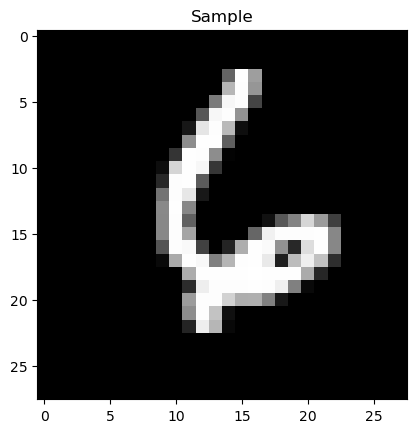

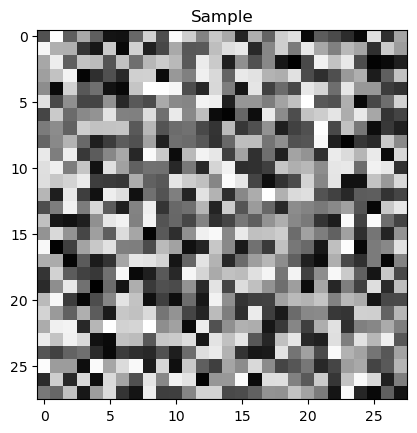

In [25]:
dl.show_border_images_of_combined_data(60_000)

In [26]:
dl.generate_zero_class_dataloader(10000, 256)

In [27]:
dl.check_dataloader(dl.zero_dataloader)
dl.check_dataloader(dl.train0_dataloader)
dl.check_dataloader(dl.train_dataloader)
dl.check_dataloader(dl.test_dataloader)
dl.check_dataloader(dl.test0_dataloader)

torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28,

In [28]:
# dl.check_elements_of_train_data_if_tensors()

In [29]:
# dl.check_elements_of_zero_class_if_tensors()

In [30]:
dl.describe_train_data()


train_data.data and test_data.data:
shapes:  torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
types:  <class 'torch.Tensor'> <class 'torch.Tensor'>
dtype:  torch.float32 torch.float32

train_data.targets and test_data.targets:
shapes:  torch.Size([60000]) torch.Size([10000])
types:  <class 'torch.Tensor'> <class 'torch.Tensor'>
dtype:  torch.int64 torch.int64


In [31]:
dl.describe_zero_class_data()


zero_class_data_for_train.data:
shapes:  torch.Size([600000, 28, 28])
types:  <class 'torch.Tensor'>
dtype:  torch.float32

zero_class_data_for_train.targets:
shapes:  torch.Size([600000])
types:  <class 'torch.Tensor'>
dtype:  torch.int64


zero_class_data_for_test.data:
shapes:  torch.Size([100000, 28, 28])
types:  <class 'torch.Tensor'>
dtype:  torch.float32

zero_class_data_for_test.targets:
shapes:  torch.Size([100000])
types:  <class 'torch.Tensor'>
dtype:  torch.int64


In [32]:
from ZeroHelperFunctions.zeroTrainer import ZeroTrainer
from Networks.networks import FullyConnectedNet

In [33]:
NUM_DIMENSIONS = 28*28
NUM_EPOCHS = 100
learning_rate = 0.01

zero_model = FullyConnectedNet(input_dim=NUM_DIMENSIONS,
                    layer1_dim=NUM_DIMENSIONS * 10,
                    layer2_dim=NUM_DIMENSIONS * 5,
                    layer3_dim=11*10,
                    num_classes=11)

simple_model = FullyConnectedNet(input_dim=NUM_DIMENSIONS,
                    layer1_dim=NUM_DIMENSIONS * 10,
                    layer2_dim=NUM_DIMENSIONS * 5,
                    layer3_dim=11*10,
                    num_classes=10)

In [34]:
# Import PyTorch
import torch
from torch import nn

zero_trainer = ZeroTrainer(model=zero_model,
                        number_of_non_zero_classes=10,
                        train_dl=dl.train0_dataloader,
                        test_dl=dl.test_dataloader,
                        purity_fact_dl=dl.test0_dataloader,
                        zero_dl=dl.zero_dataloader,
                        loss_fn=nn.CrossEntropyLoss(),
                        optimizer=torch.optim.SGD(params=zero_model.parameters(), lr=learning_rate),
                        label_of_zero_class=10,
                        device="cuda" if torch.cuda.is_available() else "cpu")

simple_trainer = ZeroTrainer(model=simple_model,
                        number_of_non_zero_classes=10,
                        train_dl=dl.train_dataloader,
                        test_dl=dl.test_dataloader,
                        purity_fact_dl=dl.test0_dataloader,
                        zero_dl=dl.zero_dataloader,
                        loss_fn=nn.CrossEntropyLoss(),
                        optimizer=torch.optim.SGD(params=simple_model.parameters(), lr=learning_rate),
                        label_of_zero_class=10,
                        device="cuda" if torch.cuda.is_available() else "cpu")

In [35]:
zero_trainer.device

'cuda'

In [36]:
zero_trainer.train(epochs=NUM_EPOCHS)

Training...(epochs: 100)
Epoch: 0
----------------
Epoch: 1
----------------
Epoch: 2
----------------
Epoch: 3
----------------
Epoch: 4
----------------
Epoch: 5
----------------
Epoch: 6
----------------
Epoch: 7
----------------
Epoch: 8
----------------
Epoch: 9
----------------
Epoch: 10
----------------
Epoch: 11
----------------
Epoch: 12
----------------
Epoch: 13
----------------
Epoch: 14
----------------
Epoch: 15
----------------
Epoch: 16
----------------
Epoch: 17
----------------
Epoch: 18
----------------
Epoch: 19
----------------
Epoch: 20
----------------
Epoch: 21
----------------
Epoch: 22
----------------
Epoch: 23
----------------
Epoch: 24
----------------
Epoch: 25
----------------
Epoch: 26
----------------
Epoch: 27
----------------
Epoch: 28
----------------
Epoch: 29
----------------
Epoch: 30
----------------
Epoch: 31
----------------
Epoch: 32
----------------
Epoch: 33
----------------
Epoch: 34
----------------
Epoch: 35
----------------
Epoch: 36
---

In [37]:
from ZeroHelperFunctions import plots

In [38]:
plots.plot_pf(zero_trainer.purities, title="Zero-Inclusive-Net", path="plots/mnist_full_zero/purity")
plots.plot_of(zero_trainer.occupancy, title="Zero-Inclusive-Net", path="plots/mnist_full_zero/occu")
plots.plot_train_test_losses(zero_trainer.train_loss,
                             zero_trainer.test_loss, title="Zero-Inclusive-Net", path="plots/mnist_full_zero/loss")
plots.plot_train_test_accs(zero_trainer.train_acc,
                           zero_trainer.test_acc, title="Zero-Inclusive-Net", path="plots/mnist_full_zero/acc")

Plot saved to plots/mnist_full_zero/purity/Zero-Inclusive-Net/Zero-Inclusive-Net_purity_factors.pdf
Plot saved to plots/mnist_full_zero/occu/Zero-Inclusive-Net/Zero-Inclusive-Net_occupancy_factor.pdf
Plot saved to plots/mnist_full_zero/loss/Zero-Inclusive-Net/Zero-Inclusive-Net_losses.pdf
Plot saved to plots/mnist_full_zero/acc/Zero-Inclusive-Net/accuracies.pdf


In [39]:
simple_trainer.train(epochs=NUM_EPOCHS)

Training...(epochs: 100)
Epoch: 0
----------------
Epoch: 1
----------------
Epoch: 2
----------------
Epoch: 3
----------------
Epoch: 4
----------------
Epoch: 5
----------------
Epoch: 6
----------------
Epoch: 7
----------------
Epoch: 8
----------------
Epoch: 9
----------------
Epoch: 10
----------------
Epoch: 11
----------------
Epoch: 12
----------------
Epoch: 13
----------------
Epoch: 14
----------------
Epoch: 15
----------------
Epoch: 16
----------------
Epoch: 17
----------------
Epoch: 18
----------------
Epoch: 19
----------------
Epoch: 20
----------------
Epoch: 21
----------------
Epoch: 22
----------------
Epoch: 23
----------------
Epoch: 24
----------------
Epoch: 25
----------------
Epoch: 26
----------------
Epoch: 27
----------------
Epoch: 28
----------------
Epoch: 29
----------------
Epoch: 30
----------------
Epoch: 31
----------------
Epoch: 32
----------------
Epoch: 33
----------------
Epoch: 34
----------------
Epoch: 35
----------------
Epoch: 36
---

In [ ]:
plots.plot_pf(simple_trainer.purities, title="Zero-Exclusive-Net", path="plots/mnist_full_no_zero/purity")
plots.plot_of(simple_trainer.occupancy, title="Zero-Exclusive-Net", path="plots/mnist_full_no_zero/occu")
plots.plot_train_test_losses(simple_trainer.train_loss,
                             simple_trainer.test_loss, title="Zero-Exclusive-Net", path="plots/mnist_full_no_zero/loss")
plots.plot_train_test_accs(simple_trainer.train_acc,
                           simple_trainer.test_acc, title="Zero-Exclusive-Net", path="plots/mnist_full_no_zero/acc")

# plots.plot_pf(simple_trainer.purities, title="Zero-Exclusive-Net")
# plots.plot_of(simple_trainer.occupancy, title="Zero-Exclusive-Net")
# plots.plot_train_test_losses(simple_trainer.train_loss, simple_trainer.test_loss, title="Zero-Exclusive-Net")
# plots.plot_train_test_accs(simple_trainer.train_acc, simple_trainer.test_acc, title="Zero-Exclusive-Net")

Plot saved to plots/mnist_full_no_zero/purity/Zero-Inclusive-Net/Zero-Inclusive-Net_purity_factors.pdf
Plot saved to plots/mnist_full_no_zero/occu/Zero-Inclusive-Net/Zero-Inclusive-Net_occupancy_factor.pdf
Plot saved to plots/mnist_full_no_zero/loss/Zero-Inclusive-Net/Zero-Inclusive-Net_losses.pdf
Plot saved to plots/mnist_full_no_zero/acc/Zero-Inclusive-Net/accuracies.pdf
